<a href="https://colab.research.google.com/github/organisciak/BookwormPython/blob/master/notebooks/Basic%20BWQuery%20Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install git+https://github.com/organisciak/BookwormPython/

In [ ]:
%matplotlib inline
import bwypy
bwypy.set_options(database='Bookworm2016', endpoint='https://bookworm.htrc.illinois.edu/cgi-bin/dbbindings.py')
bw = bwypy.BWQuery(verify_cert=False)

If I don't know the possible fields for the `bookworm4m` database, I can check `bw.fields()`:

In [6]:
bw.fields().name

0                 language
1      publication_country
2        publication_state
3                 subclass
4             narrow_class
5                    class
6            resource_type
7          target_audience
8                  scanner
9       first_author_birth
10       first_author_name
11    contributing_library
12           literary_form
13       cataloging_source
14      first_author_death
15             first_place
16         first_publisher
17                  is_gov
18          subject_places
19               date_year
20        record_date_year
Name: name, dtype: object

Let's check out the number of books (`counttype: TextCount`) by publication country (`groups: publication_country`):

In [ ]:
bw.counttype = 'TextCount'
bw.groups = ['publication_country']
results = bw.run()

Show the results as a DataFrame (a table-like construct), sorted in descending order. Printing the first 7 results.

In [8]:
df = results.frame()
df.head(7)

,TextCount
publication_country,
USA,4560313
United Kingdom,1219331
"No place, unknown, or undetermined",1182556
Germany,1070072
France,838832
Japan,477837
Italy,346024


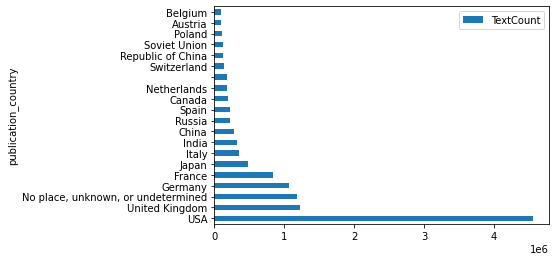

In [9]:
df.head(20).plot.barh()

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


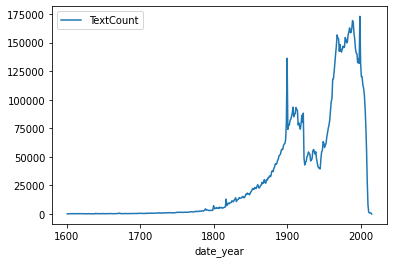

In [10]:
# Count by year, limiting to >1600 and <2016
bw.groups = ['date_year']
bw.search_limits = { 'date_year' : { "$gt": 1600, "$lt": 2016 } }
results = bw.run()
results.frame(drop_zeros=True).sort_index().plot()